In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]])}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


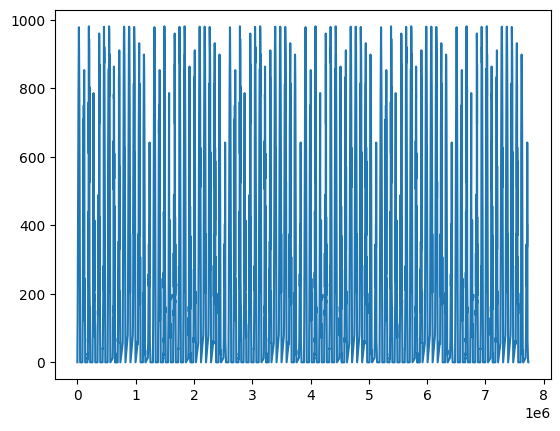

In [3]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
fig, ax = plt.subplots()
ax.plot(timestamp, irradiance)

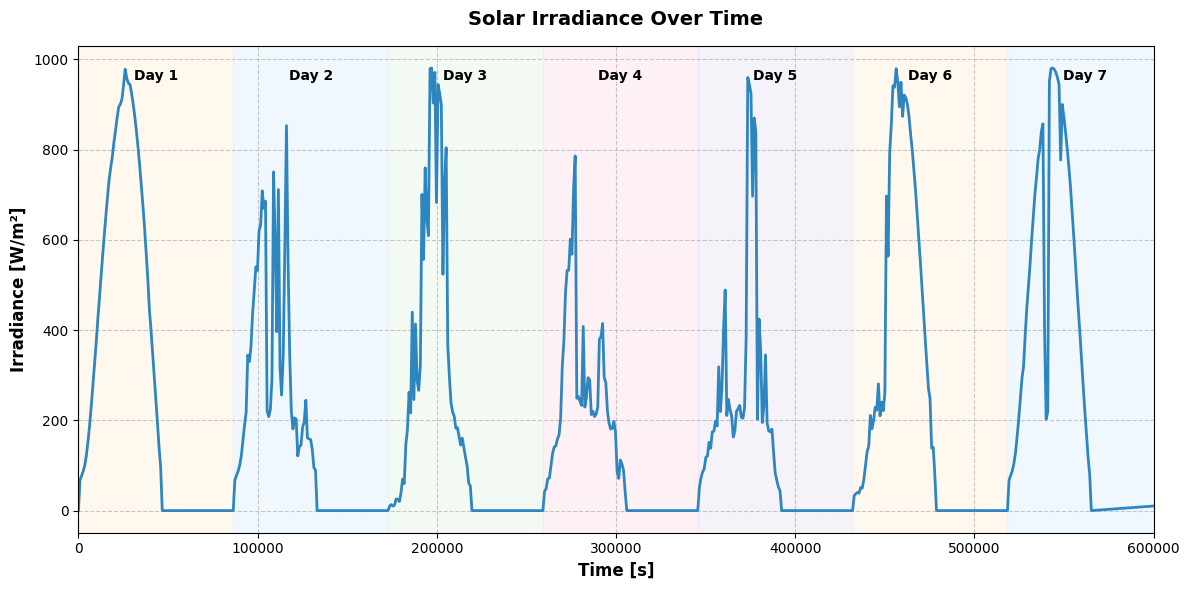

In [4]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

C:\Users\Hp\AppData\Local\Temp\ipykernel_22388\293844869.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


<Figure size 1000x600 with 0 Axes>

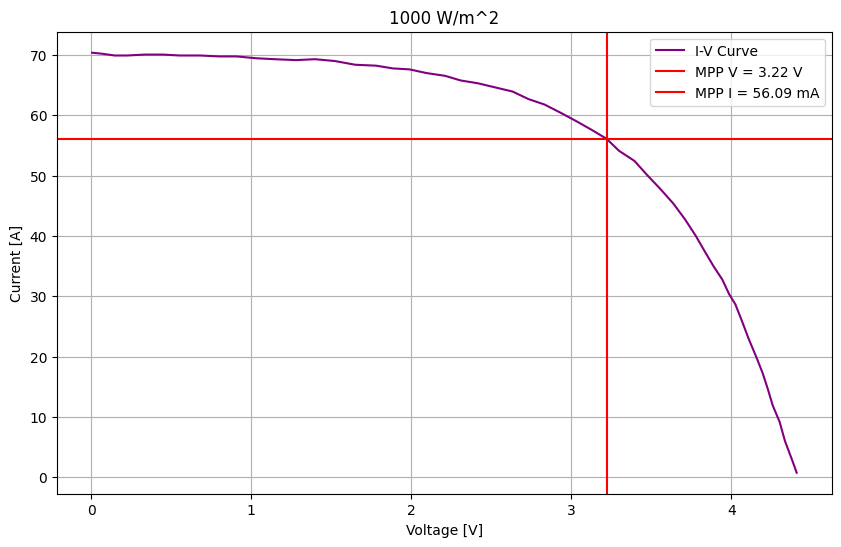

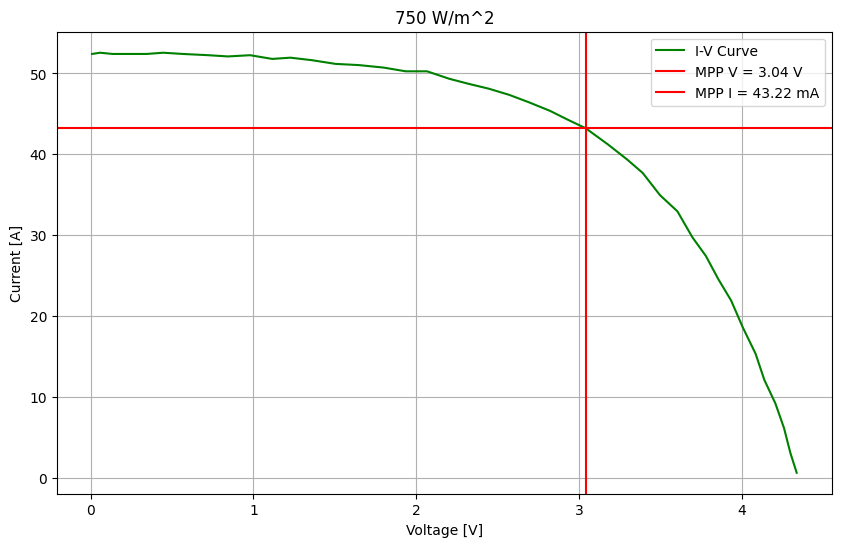

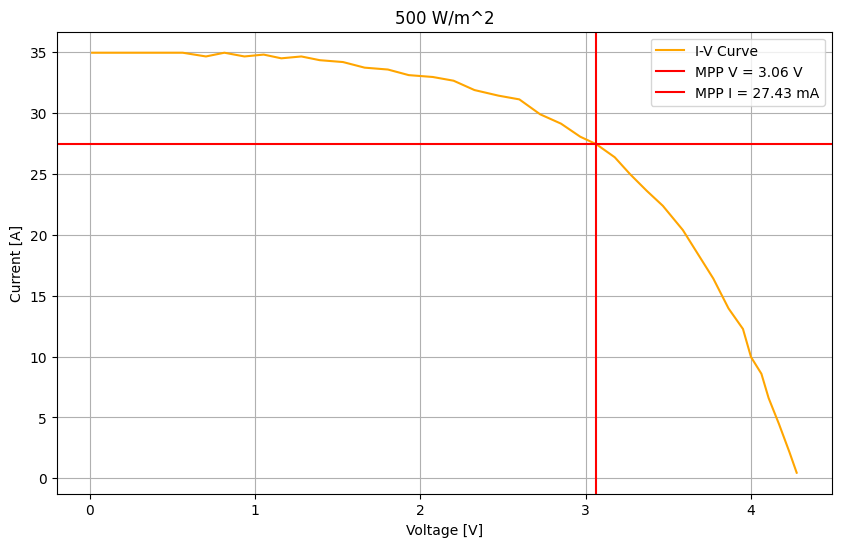

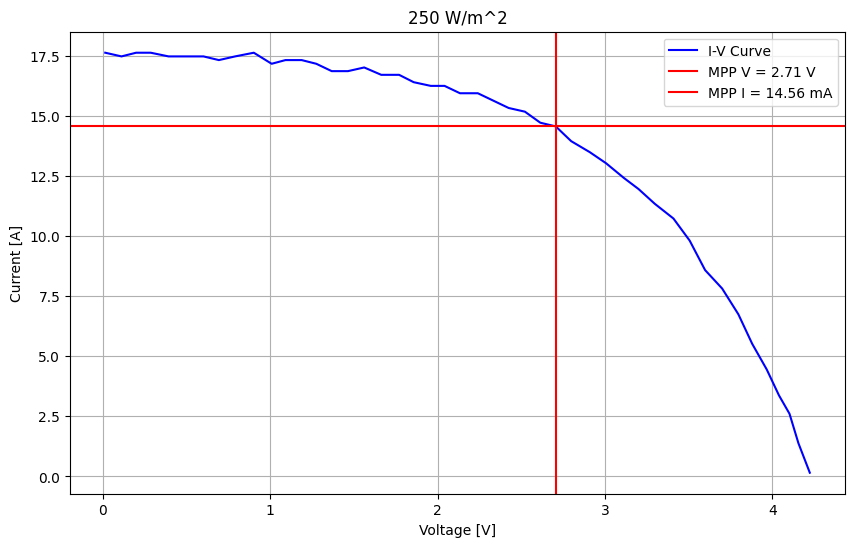

In [377]:
from scipy.ndimage.filters import gaussian_filter1d
# Extract digitalized curve points
pv_1000 = np.loadtxt('datasheet/PVcell/trace_1000.txt', delimiter=',', skiprows=0)
pv_750 = np.loadtxt('datasheet/PVcell/trace_750.txt', delimiter=',', skiprows=0)
pv_500 = np.loadtxt('datasheet/PVcell/trace_500.txt', delimiter=',', skiprows=0)
pv_250 = np.loadtxt('datasheet/PVcell/trace_250.txt', delimiter=',', skiprows=0)

# Extract columns
pv_1000_v = pv_1000[:, 0]#voltages array
pv_1000_i = pv_1000[:, 1]#current array
pv_1000_w = pv_1000_v*pv_1000_i #power array
Mpp_1000 = np.argmax(pv_1000_w)
Mpp_v_1000 = pv_1000_v[Mpp_1000]
Mpp_i_1000 = pv_1000_i[Mpp_1000]

pv_750_v = pv_750[:, 0]
pv_750_i = pv_750[:, 1]
pv_750_w = pv_750_v*pv_750_i #power array
Mpp_750 = np.argmax(pv_750_w)
Mpp_v_750 = pv_750_v[Mpp_750]
Mpp_i_750 = pv_750_i[Mpp_750]

pv_500_v = pv_500[:, 0]
pv_500_i = pv_500[:, 1]
pv_500_w = pv_500_v*pv_500_i #power array
Mpp_500 = np.argmax(pv_500_w)
Mpp_v_500 = pv_500_v[Mpp_500]
Mpp_i_500 = pv_500_i[Mpp_500]

pv_250_v = pv_250[:, 0]
pv_250_i = pv_250[:, 1]
pv_250_w = pv_250_v*pv_250_i #power array
Mpp_250 = np.argmax(pv_250_w)
Mpp_v_250 = pv_250_v[Mpp_250]
Mpp_i_250 = pv_250_i[Mpp_250]


plt.figure(figsize=(10, 6))
#plt.subplot(2,2,4)

# Plot 1000 W/m^2
plt.figure(figsize=(10, 6))
#ismoothed = gaussian_filter1d(pv_1000_i, sigma=2)
plt.plot(pv_1000_v, pv_1000_i, label='I-V Curve', color='purple')
plt.axvline(Mpp_v_1000, color='red', linestyle='-', label=f'MPP V = {Mpp_v_1000:.2f} V')
plt.axhline(Mpp_i_1000, color='red', linestyle='-', label=f'MPP I = {Mpp_i_1000:.2f} mA')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.legend()
plt.title("1000 W/m^2")
plt.grid(True)
plt.show()


# Plot 750 W/m^2
plt.figure(figsize=(10, 6))
#ismoothed = gaussian_filter1d(pv_750_i, sigma=2)
plt.plot(pv_750_v, pv_750_i, label='I-V Curve', color='green')
plt.axvline(Mpp_v_750, color='red', linestyle='-', label=f'MPP V = {Mpp_v_750:.2f} V')
plt.axhline(Mpp_i_750, color='red', linestyle='-', label=f'MPP I = {Mpp_i_750:.2f} mA')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.legend()
plt.title("750 W/m^2")
plt.grid(True)
plt.show()


# Plot 500 W/m^2
plt.figure(figsize=(10, 6))
#ismoothed = gaussian_filter1d(pv_500_i, sigma=2)
plt.plot(pv_500_v, pv_500_i, label='I-V Curve', color='orange')
plt.axvline(Mpp_v_500, color='red', linestyle='-', label=f'MPP V = {Mpp_v_500:.2f} V')
plt.axhline(Mpp_i_500, color='red', linestyle='-', label=f'MPP I = {Mpp_i_500:.2f} mA')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.legend()
plt.title("500 W/m^2")
plt.grid(True)
plt.show()


# Plot 250 W/m^2
plt.figure(figsize=(10, 6))
#ismoothed = gaussian_filter1d(pv_250_i, sigma=2)
plt.plot(pv_250_v, pv_250_i, label='I-V Curve', color='blue')
plt.axvline(Mpp_v_250, color='red', linestyle='-', label=f'MPP V = {Mpp_v_250:.2f} V')
plt.axhline(Mpp_i_250, color='red', linestyle='-', label=f'MPP I = {Mpp_i_250:.2f} mA')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.legend()
plt.title("250 W/m^2")
plt.grid(True)
plt.show()

# Extract MPP for each curve
# TODO

# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

In [246]:
# PV Panel Converter
PV_dcdc = np.loadtxt('datasheet/PV_DCDC/PV_DCDC.txt', delimiter=',', skiprows=0)

V_conv_pv = PV_dcdc[:,0]
ETA_conv_pv = PV_dcdc[:,1]

print(len(V_conv_pv))
print(*V_conv_pv, sep=', ')
print(*ETA_conv_pv, sep=', ')

120
0.6377886496100975, 0.6460396981412141, 0.6625412356585851, 0.6872938217070728, 0.7037953592244439, 0.7202968967418151, 0.7367984342591861, 0.7533005313214186, 0.7698020688387903, 0.7945546548872768, 0.7945546548872768, 0.819306681390903, 0.8275577299220196, 0.8523103159705067, 0.8605608049567618, 0.8935644395363654, 0.9183170255848531, 0.9348185631022237, 0.9595711491507113, 0.9925742241854535, 1.0255772992201961, 1.0503298852686829, 1.091584008834542, 1.1245876434141455, 1.1575907184488878, 1.1988448420147462, 1.264851551629093, 1.3226072127123216, 1.388613922326668, 1.454620631941014, 1.5206267820104984, 1.578383002638589, 1.636138663721819, 1.6938943248050486, 1.7516499858882786, 1.8259077440337403, 1.8836634051169703, 1.9496701147313165, 2.015676264800801, 2.065181436897776, 2.1146866089947505, 2.1641912215468637, 2.213696393643839, 2.2714520547270687, 2.3292077158102975, 2.3787128879072728, 2.4364685489905025, 2.4859737210874777, 2.543729382170708, 2.6014850432539367, 2.59323

![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

In [247]:
# Battery Converter
BATT_dcdc = np.loadtxt('datasheet/BATT_DCDC/batt_dcdc_new.txt', delimiter=',', skiprows=0)

V_conv_batt = BATT_dcdc[:,0]
V_conv_batt = V_conv_batt[::-1]
ETA_conv_batt = BATT_dcdc[:,1]
ETA_conv_batt = ETA_conv_batt[::-1]

print(len(V_conv_batt))
print(*V_conv_batt, sep=', ')
print(*ETA_conv_batt, sep=', ')

81
0.013531579865068479, 0.014088414291250887, 0.014668142805227848, 0.015271726747003141, 0.016224001004234555, 0.017586685410979328, 0.017586685410979328, 0.017586685410979328, 0.018683309785180423, 0.01984831458411702, 0.020665059015457544, 0.02195363653197511, 0.02332256378351315, 0.025281469850198468, 0.02632178486680826, 0.02740490812756674, 0.029706738606110616, 0.032857749162783986, 0.034906606452901924, 0.036342989190417424, 0.04019791059792985, 0.04357420883294741, 0.04536725741969531, 0.04917780607654538, 0.051201438818173926, 0.05550194411660256, 0.05896278868802002, 0.06263943552255007, 0.06654534105136227, 0.07213460960284573, 0.07978596841990993, 0.08824891119188526, 0.09959762798445417, 0.11240562407227378, 0.12184695079538868, 0.13751615196696368, 0.15520058389931396, 0.1787266030786695, 0.20581880457848936, 0.2370180908285658, 0.26749800125925, 0.3018979617558575, 0.34766104498681033, 0.39236988825836977, 0.47044031962121824, 0.5309384479616134, 0.5992157523711806, 0.

# Battery model

![](datasheet/Battery/datasheet.jpg)

In [8]:
from scipy.interpolate import interp1d

92


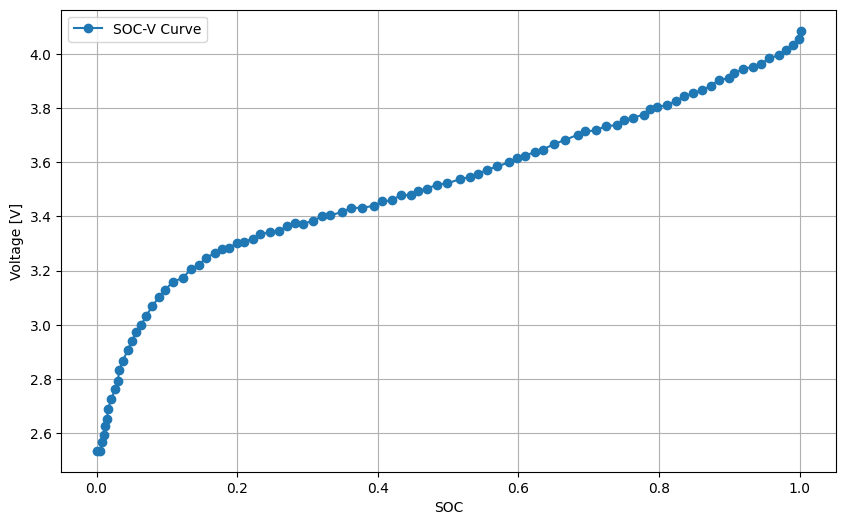

[2.53522494 2.58470953 2.71902084 2.79330486 2.8844542  2.93809254
 2.98899996 3.03197332 3.07427523 3.10855146 3.13807964 3.16076489
 3.1719361  3.19633071 3.21426242 3.23617986 3.25517083 3.26920296
 3.28035943 3.28898918 3.30305207 3.30801165 3.3177865  3.33329582
 3.33911525 3.34321768 3.35027117 3.36681441 3.37647845 3.37322017
 3.38009254 3.39065477 3.40106877 3.40459882 3.41193001 3.42144699
 3.43150691 3.43150691 3.43425454 3.43914194 3.45185393 3.45727412
 3.46579227 3.47847359 3.47847359 3.49028654 3.49866651 3.50701736
 3.51775655 3.52054936 3.52717544 3.53586421 3.54192046 3.54937834
 3.55995381 3.57275498 3.58057481 3.58945618 3.59923108 3.61318848
 3.62093537 3.63042644 3.64063247 3.64855017 3.6615833  3.67254742
 3.68235843 3.69321941 3.70428158 3.71390818 3.71651479 3.72536522
 3.73367729 3.736121   3.75098348 3.76072107 3.7675009  3.77532073
 3.79566504 3.80343982 3.80902543 3.81921964 3.83225281 3.84458091
 3.85434426 3.86336727 3.87525291 3.89162666 3.90602475 3.9092

In [9]:
# 05C
data = np.loadtxt('datasheet/Battery/05C.txt', delimiter=',', skiprows=0)
voltage_05 = data[:, 1]
soc_05 = data[:, 0]
print(len(soc_05))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(soc_05, voltage_05, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX_05c = np.linspace(0, 1, 100)
interp_func = interp1d(soc_05, voltage_05, bounds_error=False)
newY_05c = interp_func(newX_05c)

print(newY_05c)


92


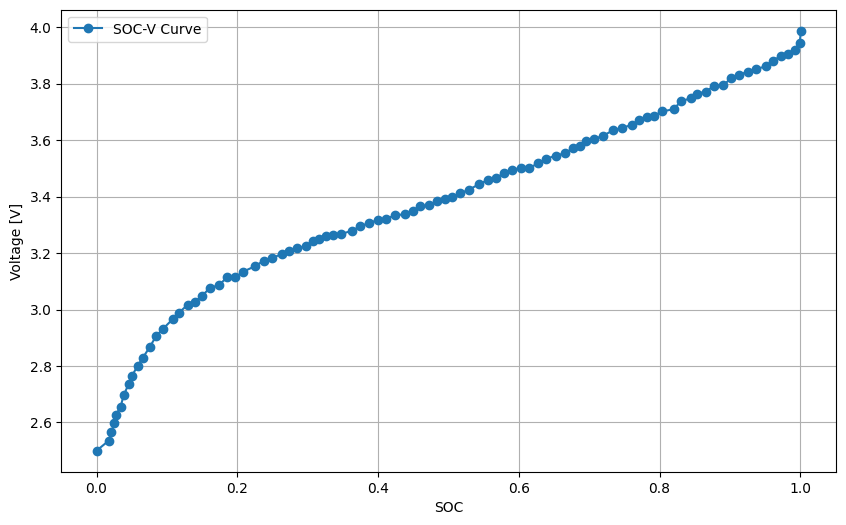

[0.         0.017189   0.02123346 0.02527806 0.02730022 0.03437813
 0.0384226  0.04550051 0.05055612 0.05864504 0.06572296 0.07583418
 0.08493425 0.09403433 0.10819002 0.11729009 0.12942361 0.14054599
 0.14964606 0.16076844 0.17391297 0.1860465  0.19716887 0.20829111
 0.22548024 0.23761377 0.248736   0.26289183 0.27401406 0.28513644
 0.29726996 0.30738118 0.31648126 0.32659248 0.33670371 0.34681493
 0.36299292 0.37411522 0.38725983 0.40040443 0.41152674 0.42467134
 0.43781595 0.4499494  0.46006063 0.47219408 0.48331646 0.49544991
 0.50556114 0.51668351 0.52881696 0.54297265 0.55611726 0.56723963
 0.57937309 0.59049546 0.60262891 0.61476237 0.62790697 0.63902928
 0.65217388 0.66531849 0.67745194 0.68655209 0.69565216 0.70677454
 0.71991907 0.73407483 0.74620828 0.76137512 0.77047519 0.78159757
 0.79170879 0.80384225 0.82002023 0.83013146 0.84428714 0.85338729
 0.86552074 0.8776542  0.8907988  0.90192111 0.91304348 0.92517693
 0.93629931 0.95146614 0.96056622 0.97269971 0.98281093 0.9919

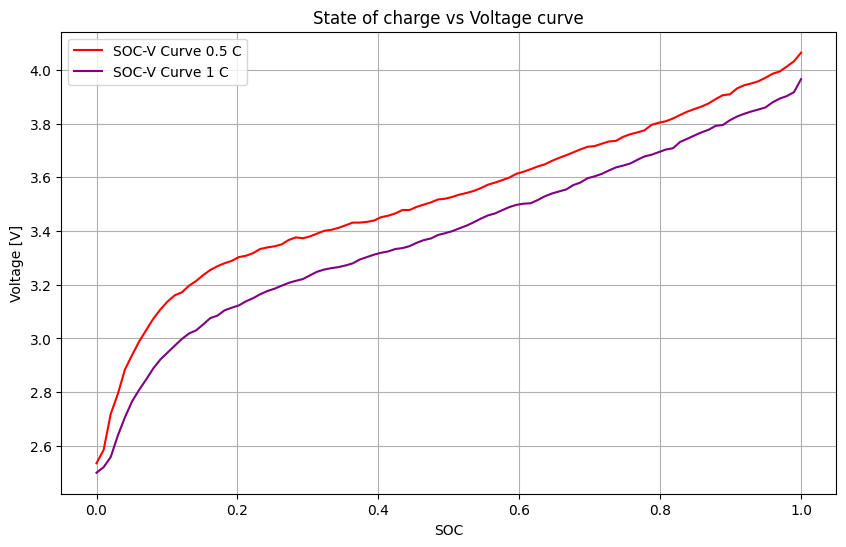

In [10]:
# 1C
data = np.loadtxt('datasheet/Battery/1C.txt', delimiter=',', skiprows=0)
voltage_1 = data[:, 1]
soc_1 = data[:, 0]
print(len(soc_1))
# Plot
plt.figure(figsize=(10, 6))
plt.plot(soc_1, voltage_1, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX_1c = np.linspace(0, 1, 100)
interp_func = interp1d(soc_1, voltage_1, bounds_error=False)
newY_1c = interp_func(newX_1c)
print(soc_1)
print(voltage_1)
print(newY_1c)

plt.figure(figsize=(10, 6))
plt.plot(newX_05c, newY_05c, label='SOC-V Curve 0.5 C', color='red')
plt.plot(newX_1c, newY_1c, label='SOC-V Curve 1 C', color = 'purple')

plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.title("State of charge vs Voltage curve")
plt.show()
plt.close()

### How to use `curve_fit`

In [11]:
from scipy.optimize import curve_fit

In [ ]:
# Fit the data to obtain R(SOC)
# Cnom = 3350mAh beacuse the graph has the cut off at 25°C
# Icurve1c = 3350 mA
# Icurve0.5c = 1675 mA
# R = Vcurve0.5C - Vcurve1C / Icurve1c - Icurve0.5C
CNOM = 3350

R = (newY_05c - newY_1c) / (CNOM-CNOM/2)

#compute R for 2 parallel battery
#R = (R*R)/(R+R)
#compute R for 3 parallel battery
#R = 1/R+1/R+1/R
#R=1/R

print(f"Resistance R: {R} KOhm")

Resistance R: [1.05149084e-05 1.91074046e-05 4.79014458e-05 4.62019407e-05
 5.30754127e-05 5.14220786e-05 5.37431156e-05 5.48995767e-05
 5.52169482e-05 5.55486573e-05 5.67739630e-05 5.59622225e-05
 5.18935660e-05 5.30453641e-05 5.49312646e-05 5.48151057e-05
 5.34540745e-05 5.49493344e-05 5.23658207e-05 5.20918861e-05
 5.37417406e-05 5.06269601e-05 5.01120535e-05 5.03399519e-05
 4.85193560e-05 4.71669594e-05 4.59377957e-05 4.76889559e-05
 4.83164762e-05 4.53582139e-05 4.32457908e-05 4.24085574e-05
 4.30968912e-05 4.25952315e-05 4.36165081e-05 4.46107882e-05
 4.52943883e-05 4.10501964e-05 3.91189778e-05 3.78844907e-05
 3.95732855e-05 3.97076647e-05 3.95569713e-05 4.23683965e-05
 4.01449978e-05 3.99567970e-05 3.94676531e-05 4.01608249e-05
 3.94710649e-05 3.83594708e-05 3.80224019e-05 3.74758416e-05
 3.63255932e-05 3.48247286e-05 3.39550108e-05 3.41850325e-05
 3.43155474e-05 3.33533594e-05 3.28349133e-05 3.44878113e-05
 3.55159503e-05 3.78516307e-05 3.73069854e-05 3.55325819e-05
 3.6320422

In [ ]:
# Fit the data to obtain V_OC(SOC)
# Voc =  Vcurve1C + R * Icurve1C
PARALLEL_BATT = 1
Voc = newY_1c + R * CNOM*PARALLEL_BATT

print(f"Voc: {Voc} V")

Voc: [2.57044989 2.64871933 2.87949068 2.94808137 3.06225683 3.1103565
 3.1690394  3.2158869  3.259252   3.29463946 3.32827241 3.34823834
 3.34577954 3.37403268 3.39828216 3.41981046 3.43424198 3.45328324
 3.45578493 3.463497   3.4830869  3.47761196 3.48566188 3.50193466
 3.50165509 3.50122699 3.50416278 3.52657241 3.53833865 3.52517019
 3.52496594 3.53272343 3.54544335 3.54729285 3.55804531 3.57089313
 3.58324312 3.56902507 3.56530311 3.56605499 3.58442444 3.5902948
 3.59830812 3.62040772 3.61295934 3.62414181 3.63088315 3.64155612
 3.64998462 3.64905358 3.65455049 3.66140828 3.6636112  3.66604118
 3.6737031  3.68727484 3.69553189 3.70118994 3.70922803 3.72872265
 3.7399138  3.7572294  3.76561087 3.76758432 3.78325672 3.79746971
 3.80970484 3.81513536 3.82778368 3.83099868 3.82904686 3.8377247
 3.84172871 3.83508438 3.85812938 3.86978465 3.86956172 3.87267787
 3.90690261 3.91287828 3.91443446 3.92993542 3.93272404 3.94552612
 3.95293458 3.95919282 3.97338365 3.99133061 4.01711918 4.00

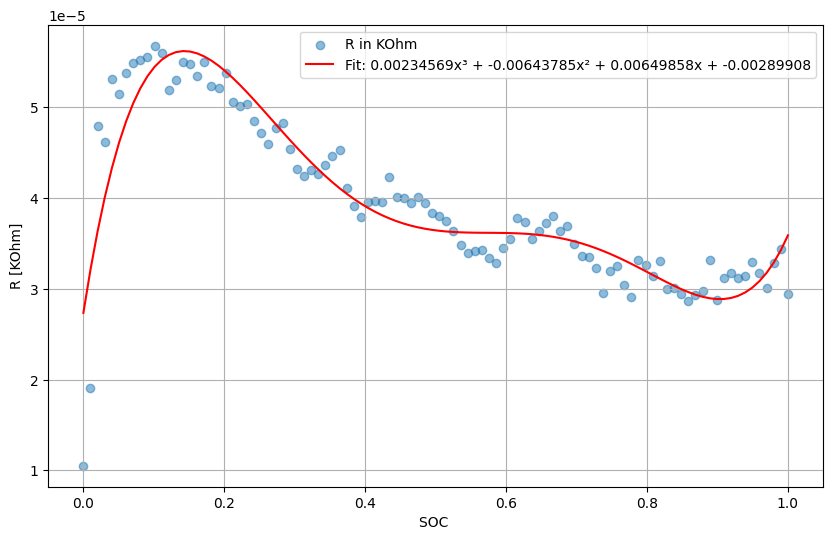

Fit: 0.00234569x³ + -0.00643785x² + 0.00649858x + -0.00289908


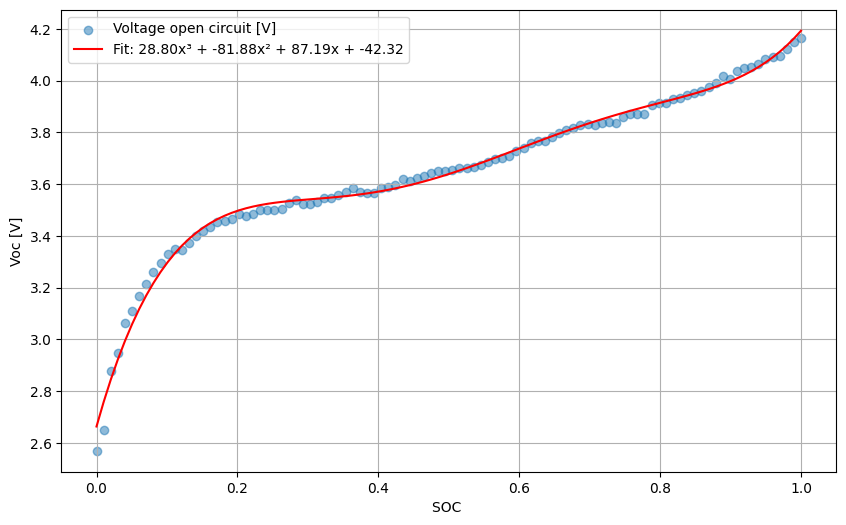

Fit: 28.80x³ + -81.88x² + 87.19x + -42.32


In [ ]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

#Fit data for R
popt, pocv = curve_fit(poly_func, newX_1c, R)


# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(newX_1c, R, alpha=0.5, label='R in KOhm')
plt.plot(newX_1c, poly_func(newX_1c, *popt), 'r-', 
         label=f'Fit: {popt[0]:.8f}x³ + {popt[1]:.8f}x² + {popt[2]:.8f}x + {popt[3]:.8f}')
plt.xlabel('SOC ')
plt.ylabel('R [KOhm]')
plt.legend()
plt.grid(True)
plt.show()
print(f'Fit: {popt[0]:.8f}x³ + {popt[1]:.8f}x² + {popt[2]:.8f}x + {popt[3]:.8f}')

#Fit data for Voc
popt, pocv = curve_fit(poly_func, newX_1c, Voc)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(newX_1c, Voc, alpha=0.5, label='Voltage open circuit [V]')
plt.plot(newX_1c, poly_func(newX_1c, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.xlabel('SOC ')
plt.ylabel('Voc [V]')
plt.legend()
plt.grid(True)
plt.show()
print(f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')

## Parallel trace graph

In [549]:
DAYS7 = 604800
DAYS2 = 172800
PERIOD = 120
OPERATING_VOLTAGE = 3.3

data = np.loadtxt('sim-trace/parallel_correct.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time = data[:,0]
soc = data[:,1]
i_tot = data[:,2] #requested i from the battery
i_mcu = data[:,3]
i_rf = data[:,4]
i_pv = data[:,5]
v_pv = data[:,6]
real_i_pv = data[:,7] #i generated by the pv panel
i_batt = data[:,8]
v_batt = data[:,9]
i_air_quality = data[:,10]
i_methane = data[:,11]
i_temperature = data[:,12]
i_mic = data[:,13]

i_consumed = i_mcu+ i_rf + i_air_quality + i_methane + i_temperature + i_mic #I load at each time

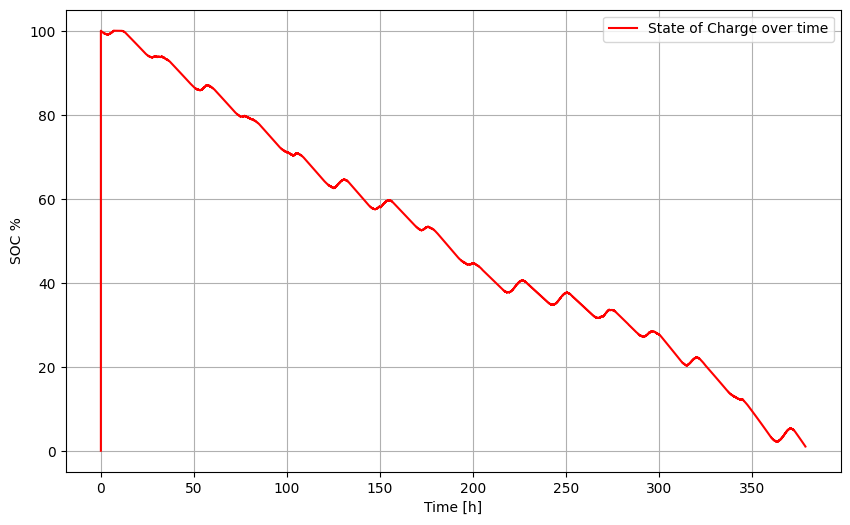

7736400


In [547]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time/3600, soc*100, 'r-', label=f'State of Charge over time')

plt.xlabel('Time [h]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()
print(TOT_SIM)

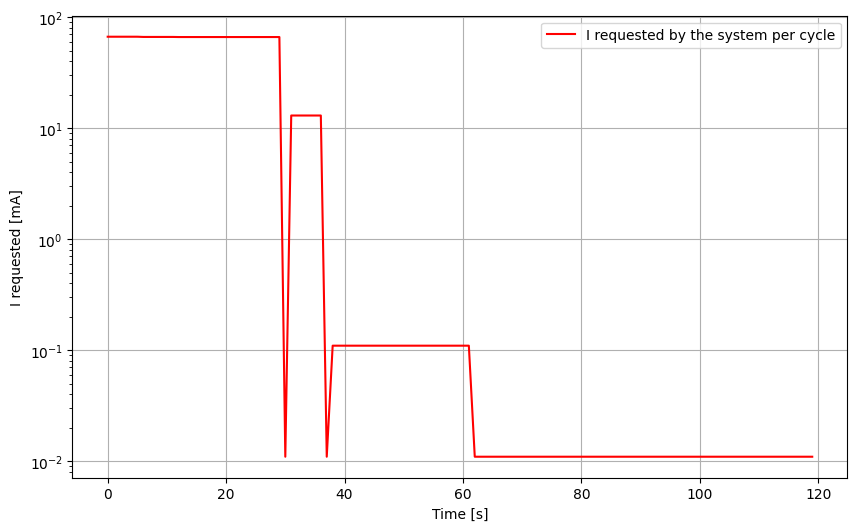

In [390]:
plt.figure(figsize=(10, 6))
plt.plot(time[0:PERIOD], i_consumed[0:PERIOD], 'r-', label=f'I requested by the system per cycle')
plt.xlabel('Time [s]')
plt.ylabel('I requested [mA]')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

#66.75
#temperature sensor goes of after 6s -0.3 mA
#mic click goeas off after 12s -0.15 mA
#air quality and methane sensor goes off after 30s -48.2 mA -18 mA

#then mcu computes the data for 6s at 13 mA
#then rf_radio sends data for 24s at 0.1 mA

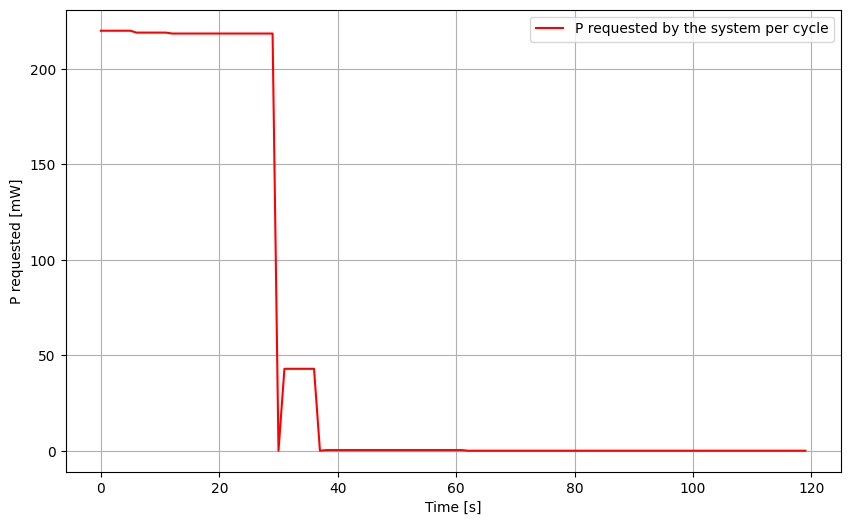

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(time[0:PERIOD], i_consumed[0:PERIOD]*OPERATING_VOLTAGE, 'r-', label=f'P requested by the system per cycle')
plt.xlabel('Time [s]')
plt.ylabel('P requested [mW]')
plt.legend()
plt.grid(True)
plt.show()

#66.75
#temperature sensor goes of after 6s -0.3 mA
#mic click goeas off after 12s -0.15 mA
#air quality and methane sensor goes off after 30s -48.2 mA -18 mA

#then mcu computes the data for 6s at 13 mA
#then rf_radio sends data for 24s at 0.1 mA

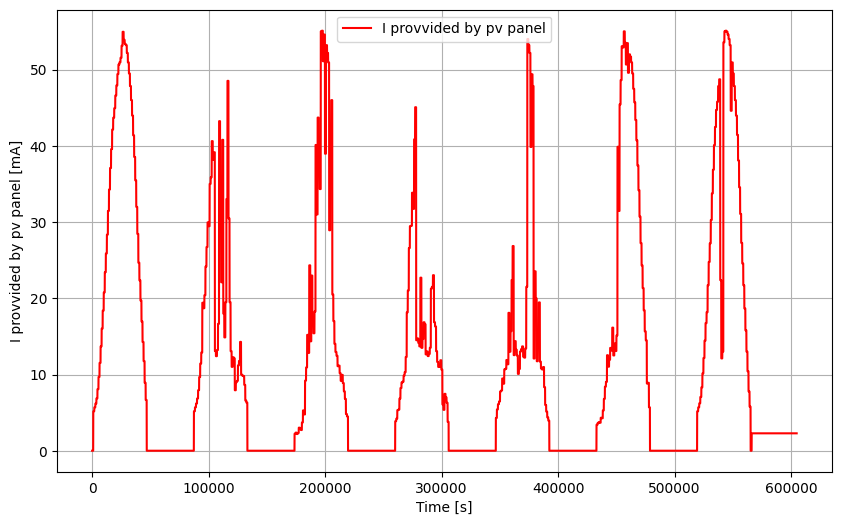

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time[0:DAYS7], i_pv[0:DAYS7], 'r-', label=f'I provvided by pv panel')
plt.xlabel('Time [s]')
plt.ylabel('I provvided by pv panel [mA]')
plt.legend()
plt.grid(True)
plt.show()

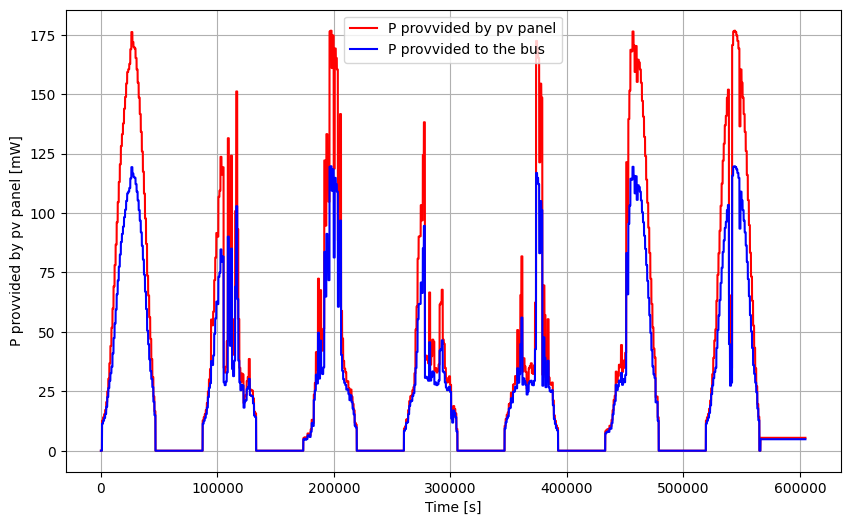

In [392]:
#efficency of the pv converter
plt.figure(figsize=(10, 6))
plt.plot(time[0:DAYS7], i_pv[0:DAYS7]*v_pv[0:DAYS7], 'r-', label=f'P provvided by pv panel')
plt.plot(time[0:DAYS7], real_i_pv[0:DAYS7]*OPERATING_VOLTAGE, 'b-', label=f'P provvided to the bus')
plt.xlabel('Time [s]')
plt.ylabel('P provvided by pv panel [mW]')
plt.legend()
plt.grid(True)
plt.show()


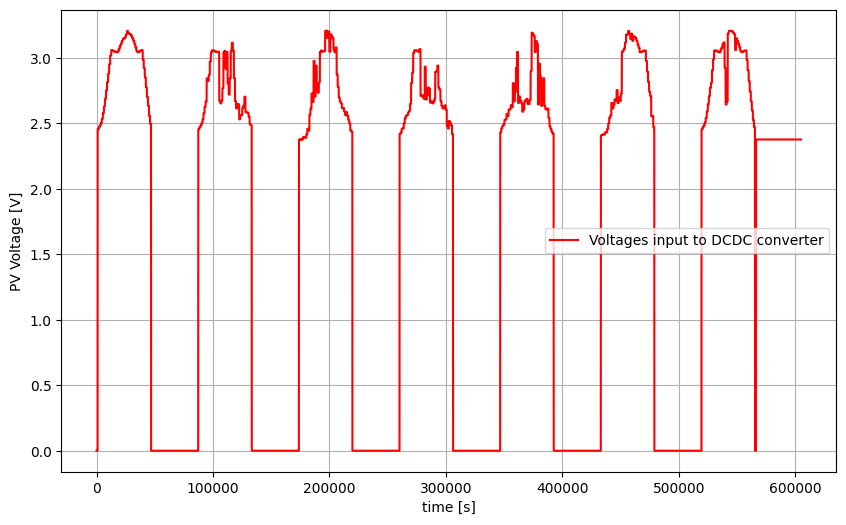

In [ ]:
#efficency of the pv converter

plt.figure(figsize=(10, 6))
plt.plot( time[0:DAYS7], v_pv[0:DAYS7], 'r-', label=f'Voltages input to DCDC converter')
plt.xlabel('time [s]')
plt.ylabel('PV Voltage [V]')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
f_days_i = real_i_pv[0:DAYS7]

f_days_i_pv = i_pv[0:DAYS7]

f_days_v_pv = v_pv[0:DAYS7]

Pout = f_days_i*OPERATING_VOLTAGE
Pin = f_days_i_pv*f_days_v_pv
#calculating the efficiency
eff = np.divide(Pout, Pin)
eff = eff*100


C:\Users\Hp\AppData\Local\Temp\ipykernel_22388\2306332063.py:10: RuntimeWarning: invalid value encountered in divide
  eff = np.divide(Pout, Pin)


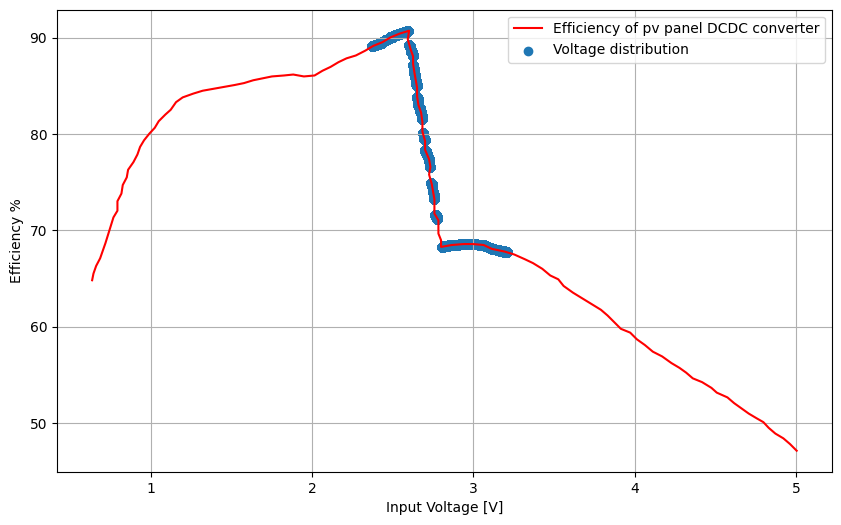

In [ ]:
#efficency of the pv converter

plt.figure(figsize=(10, 6))
plt.plot(V_conv_pv, ETA_conv_pv, 'r-', label=f'Efficiency of pv panel DCDC converter')
plt.scatter(f_days_v_pv, eff, label=f'Voltage distribution')
plt.xlabel('Input Voltage [V]')
plt.ylabel('Efficiency %')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_22388\2911169901.py:5: RuntimeWarning: invalid value encountered in divide
  eff = np.divide(Pout, Pin)


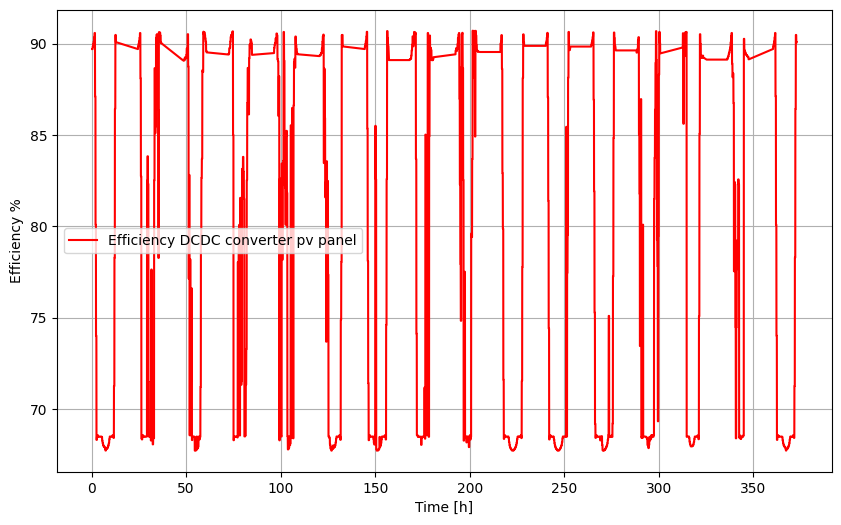

Mean efficiency: 80.1259759071958%


In [399]:
import statistics
Pout = real_i_pv*OPERATING_VOLTAGE
Pin = i_pv*v_pv
#calculating the efficiency
eff = np.divide(Pout, Pin)
eff = eff*100
mask = np.isfinite(eff) & (eff > 0)
eff = eff[mask]

plt.figure(figsize=(10, 6))
plt.plot(time[mask]/3600, eff, "r-", label=f'Efficiency DCDC converter pv panel')
plt.xlabel('Time [h]')
plt.ylabel('Efficiency %')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean efficiency: {statistics.mean(eff)}%")

## Efficiency DCDC battery

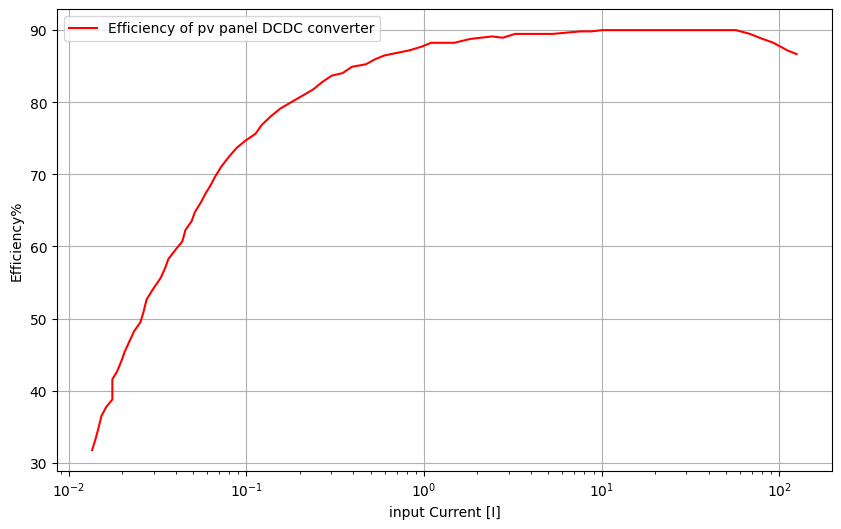

In [600]:
plt.figure(figsize=(10, 6))
plt.plot(V_conv_batt, ETA_conv_batt, 'r-', label=f'Efficiency of pv panel DCDC converter')
plt.xlabel('input Current [I]')
plt.ylabel('Efficiency%')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

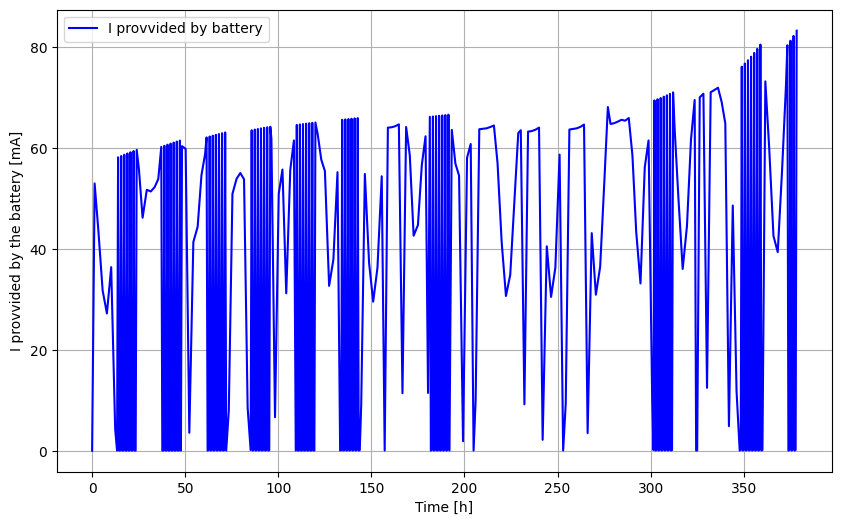

In [ ]:
#efficency of the pv converter

# i_in = i_tot
# time_batt = time
# i_out = i_batt
# v_out = v_batt

i_in = i_batt[i_tot >= 0]
time_batt = time[i_tot >= 0]
i_out = i_tot[i_tot >= 0]
v_in = v_batt[i_tot >= 0]


time_batt = time_batt[i_in >= 0]
v_in = v_in[i_in >= 0]
i_out = i_out[i_in >= 0]
i_in = i_in[i_in >= 0]


plt.figure(figsize=(10, 6))
plt.plot(time_batt[::2000]/3600, i_in[::2000], 'b-', label=f'I provvided by battery')
plt.xlabel('Time [h]')
plt.ylabel('I provvided by the battery [mA]')
plt.legend()
plt.grid(True)
plt.show()

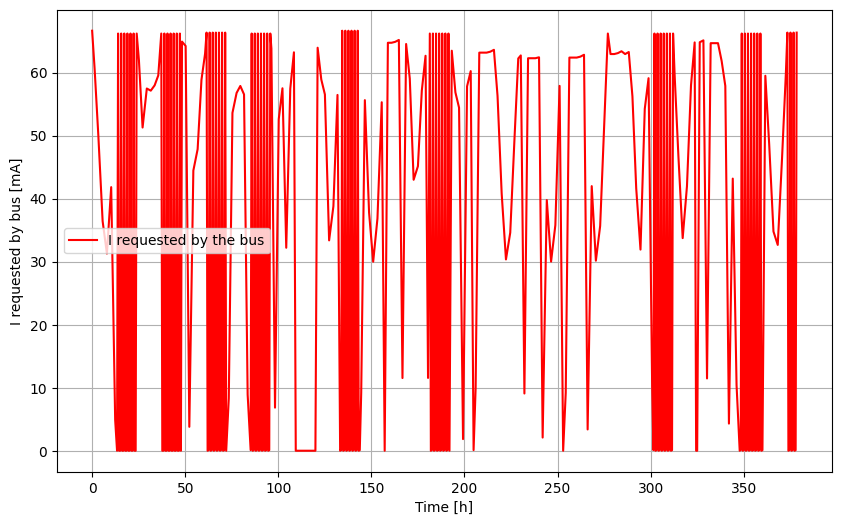

In [588]:
plt.figure(figsize=(10, 6))
plt.plot(time_batt[::2000]/3600, i_out[::2000], 'r-', label=f'I requested by the bus')
plt.xlabel('Time [h]')
plt.ylabel('I requested by bus [mA]')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_22388\1635013689.py:7: RuntimeWarning: divide by zero encountered in divide
  eff_discharge = np.divide(P_out_discharge, P_in_discharge,


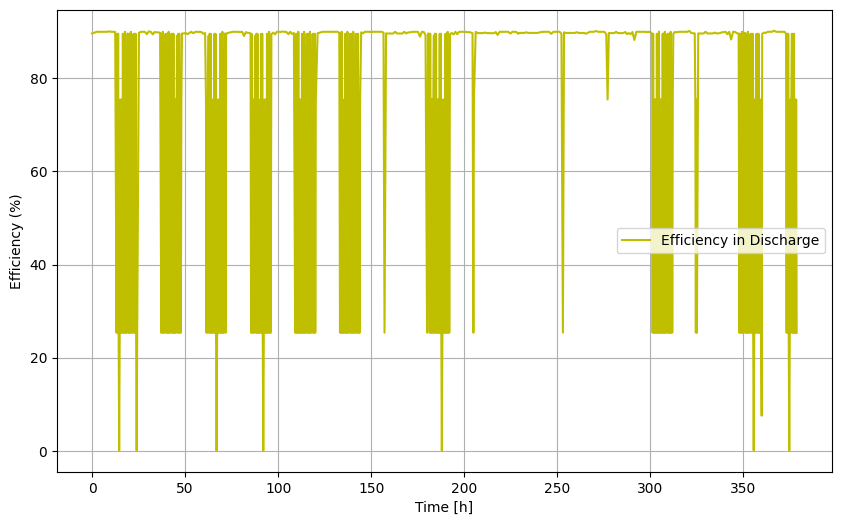

Mean efficiency: 67.84376433257002%


In [599]:
# Calcolo potenza in uscita e in ingresso

P_out_discharge = 3.3 * i_out  # Potenza erogata al bus
P_in_discharge = v_in * i_in  # Potenza assorbita dalla batteria

# Efficienza nei due casi
eff_discharge = np.divide(P_out_discharge, P_in_discharge, 
                       out=np.zeros_like(P_out_discharge), where=(P_out_discharge != 0)) * 100

time_batt_100 = time_batt[eff_discharge<=100]
eff_discharge = eff_discharge[eff_discharge<=100]

# Grafico efficienza in scarica
plt.figure(figsize=(10, 6))
plt.plot(time_batt_100[::1000]/3600, eff_discharge[::1000], 'y-', label='Efficiency in Discharge')

plt.xlabel('Time [h]')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean efficiency: {statistics.mean(eff_discharge)}%")

## I harvested and used by the battery
As we can see the porovvided I at each max irradiance time in all days is never enough to cover the load current requested by the sensors and the MCU. For this reason the battery has to do a lot of work to compensate the low current production of the PV panels. As we see from the MPP also if the max irradiances will be better the single pv panel will be unable to provvide by itself all the requested current.

c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


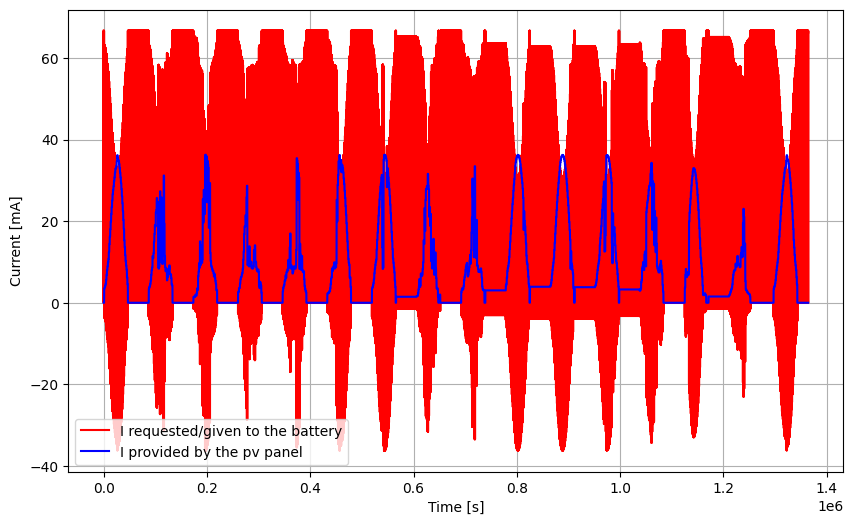

Battery is used for 49.47435563750738% of time of the simulation


In [373]:
plt.figure(figsize=(10, 6))
plt.plot(time[0:TOT_SIM], i_tot[0:TOT_SIM], "r-", label=f'I requested/given to the battery')
plt.plot(time[0:TOT_SIM], real_i_pv[0:TOT_SIM], "b-", label=f'I provided by the pv panel')

plt.xlabel('Time [s]')
plt.ylabel('Current [mA]')
plt.legend()
plt.grid(True)
plt.show()

used = len(i_tot[i_tot>0])
print(f"Battery is used for {(used*100)/len(time)}% of time of the simulation")

## 2 Parallel pv panel

In [542]:
data = np.loadtxt('sim-trace/parallel_config/2p.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_2p = data[:,0]
soc_2p = data[:,1]
i_pv_2p = data[:,5]
v_pv_2p = data[:,6]
real_i_pv_2p = data[:,7] #i generated by the pv panel


c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


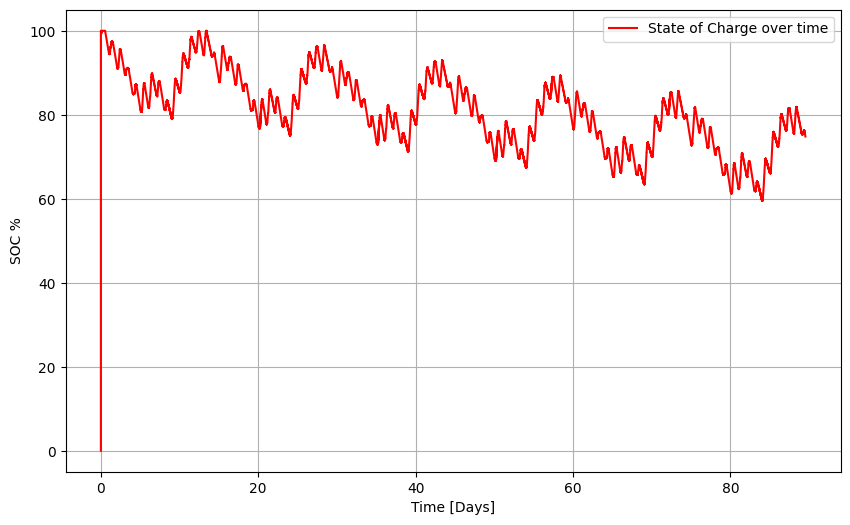

In [535]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_2p/86400, soc_2p*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

## 2 Parallel battery

In [ ]:
#2 battery in parallel
data = np.loadtxt('sim-trace/parallel_config/2b.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_2b = data[:,0]
soc_2b = data[:,1]
i_p_2b = data[:,5]
v_pv_2b = data[:,6]
real_i_pv_2b = data[:,7] #i generated by the pv panel

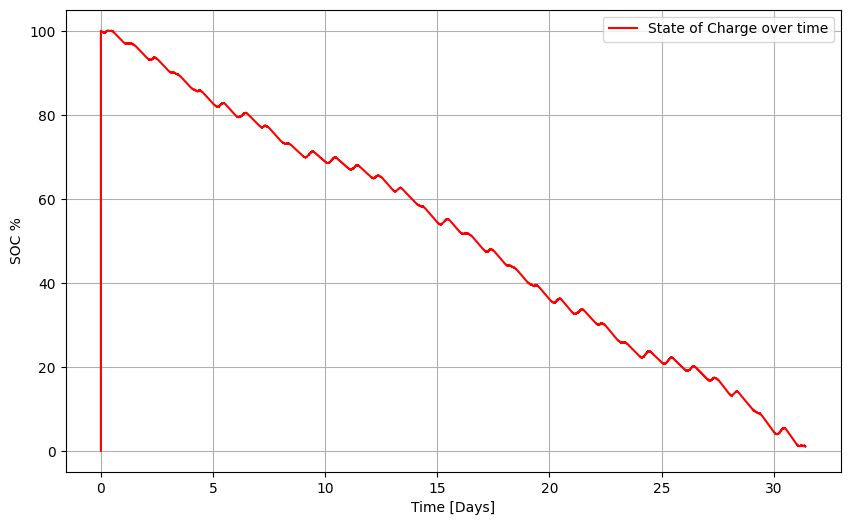

In [537]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_2b/86400, soc_2b*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

## 2 Parallel battery and pv panel

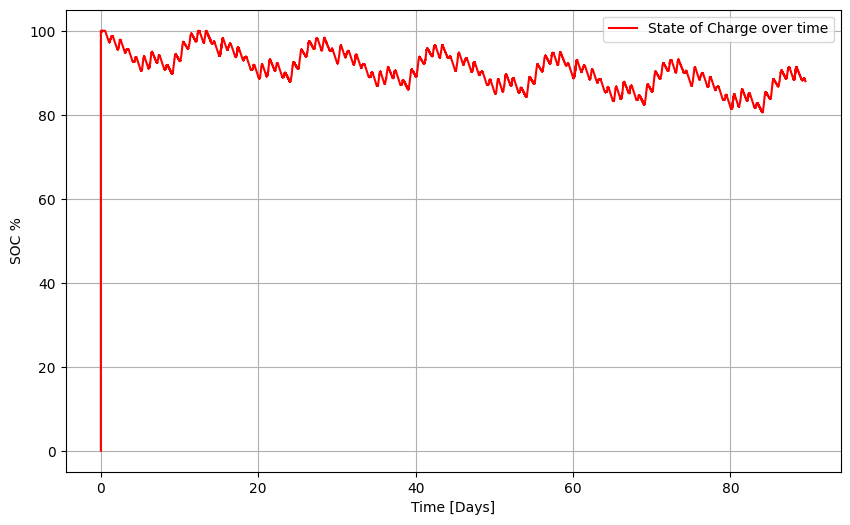

In [538]:
#2 battery in parallel
data = np.loadtxt('sim-trace/parallel_config/2b_2p.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_2b_2p = data[:,0]
soc_2b_2p = data[:,1]
i_p_2b_2p = data[:,5]
v_pv_2b_2p = data[:,6]
real_i_pv_2b_2p = data[:,7] #i generated by the pv panel

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_2b_2p/86400, soc_2b_2p*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

## 3 parallel battery 1 pv panel

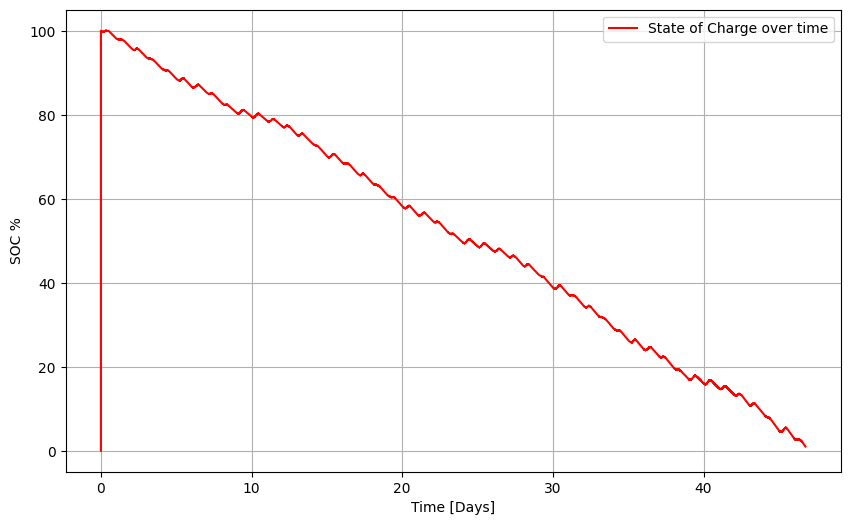

In [539]:
#2 battery in parallel
data = np.loadtxt('sim-trace/parallel_config/3b.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_3b = data[:,0]
soc_3b = data[:,1]
i_p_3b = data[:,5]
v_pv_3b = data[:,6]
real_i_pv_3b = data[:,7] #i generated by the pv panel

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_3b/86400, soc_3b*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

## Comparison

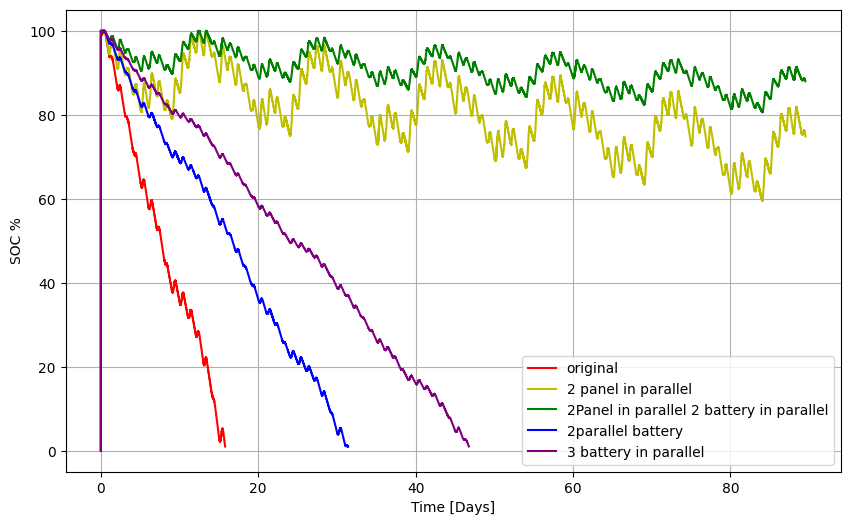

In [540]:
plt.figure(figsize=(10, 6))
plt.plot(time/86400, soc*100, 'r-', label=f'original')
plt.plot(time_2p/86400, soc_2p*100, 'y-', label=f'2 panel in parallel')
plt.plot(time_2b_2p/86400, soc_2b_2p*100, 'g-', label=f'2Panel in parallel 2 battery in parallel')
plt.plot(time_2b/86400, soc_2b*100, 'b-', label=f'2parallel battery')
plt.plot(time_3b/86400, soc_3b*100, linestyle='-', color='purple', label=f'3 battery in parallel')

plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

# series conf
## from most power hungry to less

In [ ]:
#from most power hungry to less
data = np.loadtxt('sim-trace/serial.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_3 = data[:,0]
soc_3 = data[:,1]
i_tot_3 = data[:,2] #requested i from the battery
i_mcu_3 = data[:,3]
i_rf_3 = data[:,4]
i_pv_3 = data[:,5]
v_pv_3 = data[:,6]
real_i_pv_3 = data[:,7] #i generated by the pv panel
i_bat_3 = data[:,8]
v_batt_3 = data[:,9]
i_air_quality_3 = data[:,10]
i_methane_3 = data[:,11]
i_temperature_3 = data[:,12]
i_mic_3 = data[:,13]

i_consumed_3 = i_mcu_3+ i_rf_3 + i_air_quality_3 + i_methane_3 + i_temperature_3 + i_mic_3 #I load at each time

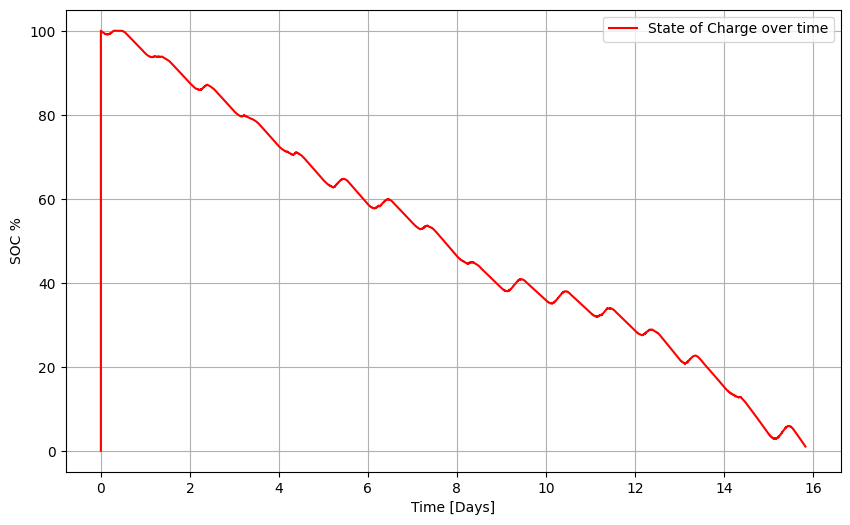

In [448]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_3/86400, soc_3*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

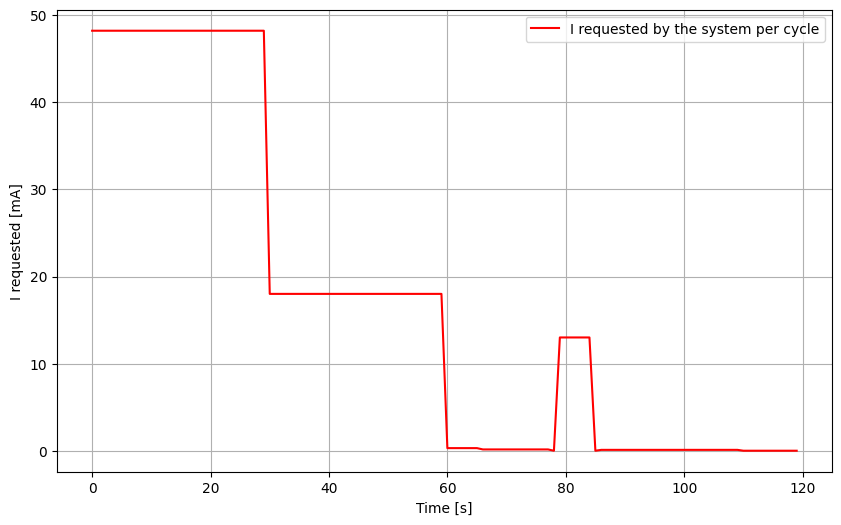

In [449]:
plt.figure(figsize=(10, 6))
plt.plot(time_3[0:PERIOD], i_consumed_3[0:PERIOD], 'r-', label=f'I requested by the system per cycle')
plt.xlabel('Time [s]')
plt.ylabel('I requested [mA]')
plt.legend()
plt.grid(True)
plt.show()

#66.75
#temperature sensor goes of after 6s -0.3 mA
#mic click goeas off after 12s -0.15 mA
#air quality and methane sensor goes off after 30s -48.2 mA -18 mA

#then mcu computes the data for 6s at 13 mA
#then rf_radio sends data for 24s at 0.1 mA

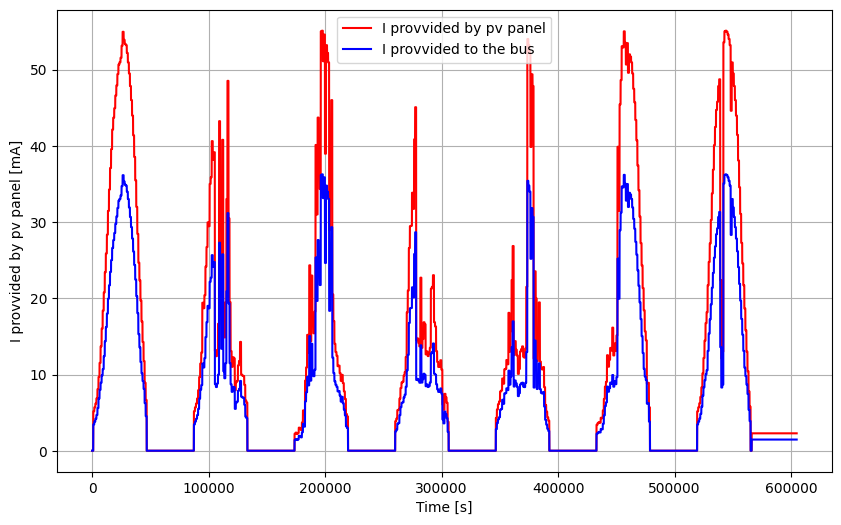

In [457]:
#efficency of the pv converter
plt.figure(figsize=(10, 6))
plt.plot(time_3[0:DAYS7], i_pv_3[0:DAYS7], 'r-', label=f'I provvided by pv panel')
plt.plot(time_3[0:DAYS7], real_i_pv_3[0:DAYS7], 'b-', label=f'I provvided to the bus')
plt.xlabel('Time [s]')
plt.ylabel('I provvided by pv panel [mA]')
plt.legend()
plt.grid(True)
plt.show()

## From less power hungry to most

In [ ]:
#from less power hungry to most
data = np.loadtxt('sim-trace/serial_trace/serial2.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_3 = data[:,0]
soc_3 = data[:,1]
i_tot_3 = data[:,2] #requested i from the battery
i_mcu_3 = data[:,3]
i_rf_3 = data[:,4]
i_pv_3 = data[:,5]
v_pv_3 = data[:,6]
real_i_pv_3 = data[:,7] #i generated by the pv panel
i_bat_3 = data[:,8]
v_batt_3 = data[:,9]
i_air_quality_3 = data[:,10]
i_methane_3 = data[:,11]
i_temperature_3 = data[:,12]
i_mic_3 = data[:,13]

i_consumed_3 = i_mcu_3+ i_rf_3 + i_air_quality_3 + i_methane_3 + i_temperature_3 + i_mic_3 #I load at each time

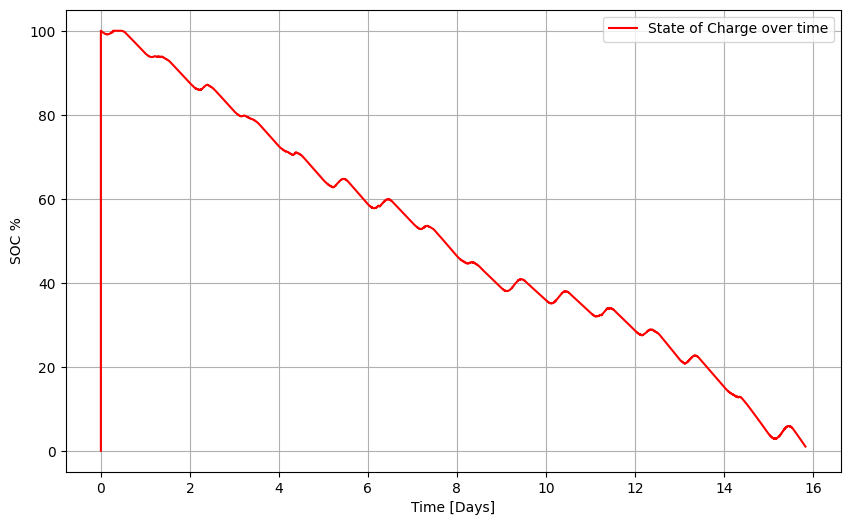

In [451]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_3/86400, soc_3*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

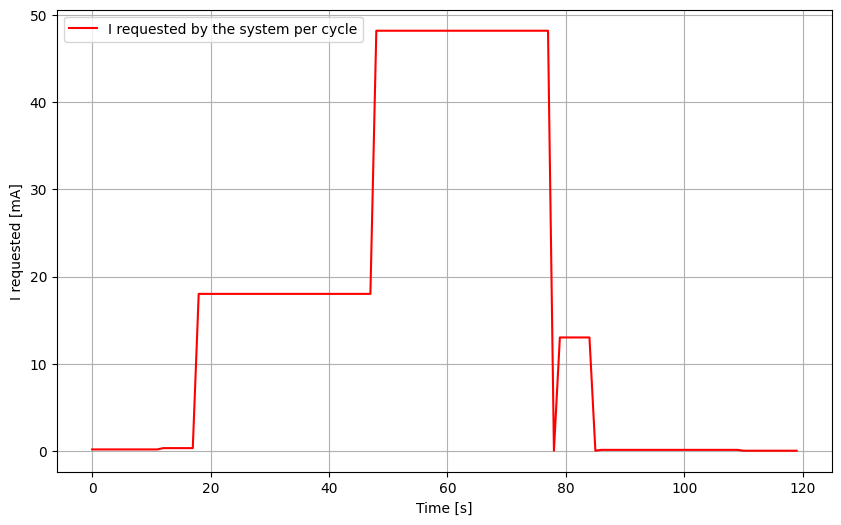

In [452]:
plt.figure(figsize=(10, 6))
plt.plot(time_3[0:PERIOD], i_consumed_3[0:PERIOD], 'r-', label=f'I requested by the system per cycle')
plt.xlabel('Time [s]')
plt.ylabel('I requested [mA]')
plt.legend()
plt.grid(True)
plt.show()

#66.75
#temperature sensor goes of after 6s -0.3 mA
#mic click goeas off after 12s -0.15 mA
#air quality and methane sensor goes off after 30s -48.2 mA -18 mA

#then mcu computes the data for 6s at 13 mA
#then rf_radio sends data for 24s at 0.1 mA

## power hungry and not + delay

In [453]:
#from less power hungry to most
data = np.loadtxt('sim-trace/serial_trace/serial3.txt', delimiter=' ', skiprows=1)
TOT_SIM = len(data)
time_3 = data[:,0]
soc_3 = data[:,1]
i_tot_3 = data[:,2] #requested i from the battery
i_mcu_3 = data[:,3]
i_rf_3 = data[:,4]
i_pv_3 = data[:,5]
v_pv_3 = data[:,6]
real_i_pv_3 = data[:,7] #i generated by the pv panel
i_bat_3 = data[:,8]
v_batt_3 = data[:,9]
i_air_quality_3 = data[:,10]
i_methane_3 = data[:,11]
i_temperature_3 = data[:,12]
i_mic_3 = data[:,13]

i_consumed_3 = i_mcu_3+ i_rf_3 + i_air_quality_3 + i_methane_3 + i_temperature_3 + i_mic_3 #I load at each time

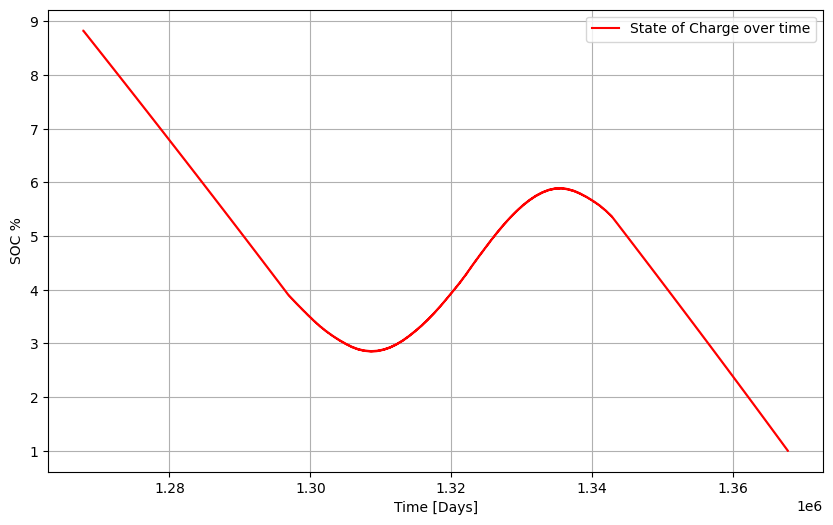

In [469]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_3[len(time_3)-100000:len(time_3)], soc_3[len(time_3)-100000:len(time_3)]*100, 'r-', label=f'State of Charge over time')
plt.xlabel('Time [Days]')
plt.ylabel('SOC %')
plt.legend()
plt.grid(True)
plt.show()

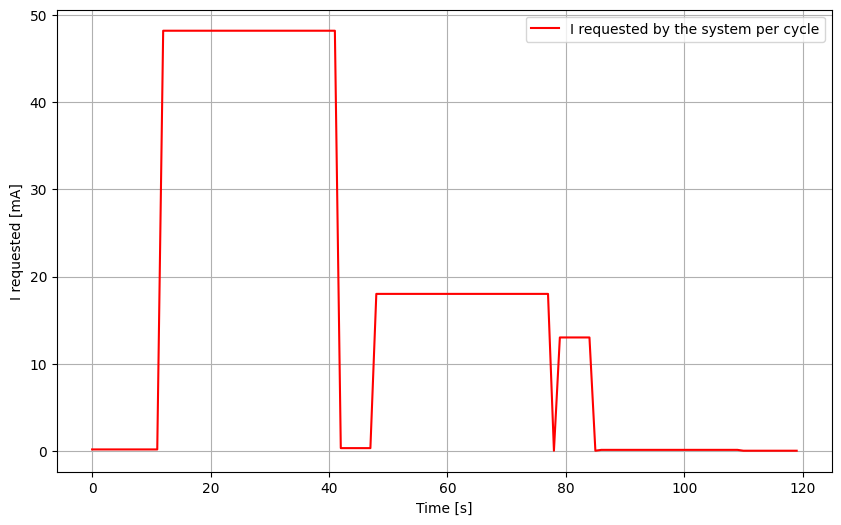

In [455]:
plt.figure(figsize=(10, 6))
plt.plot(time_3[0:PERIOD], i_consumed_3[0:PERIOD], 'r-', label=f'I requested by the system per cycle')
plt.xlabel('Time [s]')
plt.ylabel('I requested [mA]')
plt.legend()
plt.grid(True)
plt.show()

#66.75
#temperature sensor goes of after 6s -0.3 mA
#mic click goeas off after 12s -0.15 mA
#air quality and methane sensor goes off after 30s -48.2 mA -18 mA

#then mcu computes the data for 6s at 13 mA
#then rf_radio sends data for 24s at 0.1 mA